Estatística descritiva é entendida como um conjunto de técnicas para facilitar a exploração, análise e sumarização de dados, bem como sua eficiente comunicação ao público interessado. 

Dentre as muitas técnicas utilizadas pela estatística descritiva estão as tabelas de frequência e os gráficos do tipo pizza e barras. Neste artigo, exploramos estas ferramentas, indicando as situações de uso mais comum, e as situações possivelmente inadequadas.

Para a construção de exemplos, utilizamos a linguagem Python com as bibliotecas Numpy, Pandas e Matplotlib, e um banco de dados dos passageiros do navio Titanic, afundado no Atlântico Norte, em 1914.

O objetivo desse artigo não é discutir a tecnologia envolvida na construção dos exemplos, e sim o conceito estatístico. Entretanto, divulgaremos os códigos dos exemplos, especialmente para os leitores interessados em estuda-los e adapta-los para a sua realidade. 

## Instalação dos pacotes **rdatasets**, que contém diversos bancos de dados para estudos, **numpy**, para matemática matricial, **pandas**, para facilitar operações com *dataframes*, e **matplotlib**, para criação de gráficos.

In [ ]:
!pip install rdatasets

In [ ]:
from rdatasets import data

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

### Carga do banco de dados específico sobre os passageiros do Titanic

In [ ]:
titanic = data("carData","TitanicSurvival")

In [ ]:
titanic

,survived,sex,age,passengerClass
0,yes,female,29.0000,1st
1,yes,male,0.9167,1st
2,no,female,2.0000,1st
3,no,male,30.0000,1st
4,no,female,25.0000,1st
...,...,...,...,...
1304,no,female,14.5000,3rd
1305,no,female,NaN,3rd
1306,no,male,26.5000,3rd
1307,no,male,27.0000,3rd


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   survived        1309 non-null   object 
 1   sex             1309 non-null   object 
 2   age             1046 non-null   float64
 3   passengerClass  1309 non-null   object 
dtypes: float64(1), object(3)
memory usage: 41.0+ KB


## Tabelas de Frequência por Classes

**Tabelas de frequência são tabelas que expõem contagens de quantas vezes um determinado evento aconteceu. Normalmente cria-se tabelas de frequência classificando-se e contando-se as ocorrências por tipo ou tipos.**

**O código seguinte calcula uma tabela de frequência que mostra quantos passageiros sobreviveram ao naufrágio e quantos não sobreviveram.**

In [ ]:
pd.crosstab(index=titanic["survived"], columns="count", margins=True).drop(columns=["All"])

col_0,count
survived,
no,809
yes,500
All,1309


**O código seguinte calcula uma tabela de frequência bidimensional, contando quantos passageiros sobreviveram e não sobreviveram, por classe de passageiro.**

In [ ]:
titanic_class = pd.crosstab(index=titanic["survived"],columns=titanic["passengerClass"], margins=True) 

In [ ]:
titanic_class

passengerClass,1st,2nd,3rd,All
survived,,,,
no,123,158,528,809
yes,200,119,181,500
All,323,277,709,1309


**Uma variação na tabela de frequência seria mostrar, ao invés da contagem, o percentual. No exemplo abaixo, mostramos o percentual de sobrevivência ou não, por classe de viagem.**

In [ ]:
titanic_class/titanic_class.loc["All"]

passengerClass,1st,2nd,3rd,All
survived,,,,
no,0.380805,0.570397,0.744711,0.618029
yes,0.619195,0.429603,0.255289,0.381971
All,1.000000,1.000000,1.000000,1.000000


**Alternativamente, pode-se calcular o percentual de classe de viage, dentro dos que sobreviveram ou não, como no exemplo abaixo.**

In [ ]:
titanic_class.div(titanic_class["All"], axis=0)

passengerClass,1st,2nd,3rd,All
survived,,,,
no,0.152040,0.195303,0.652658,1.0
yes,0.400000,0.238000,0.362000,1.0
All,0.246753,0.211612,0.541635,1.0


**A seguir, calculamos uma tabela de frequência que conta os sobreviventes ou não, por sexo do passageiro.**

In [ ]:
titanic_sex = pd.crosstab(index=titanic["survived"],columns=titanic["sex"], margins=True) 

In [ ]:
titanic_sex

sex,female,male,All
survived,,,
no,127,682,809
yes,339,161,500
All,466,843,1309


**Alternativamente podemos calcular o percentual de sobreviventes ou não, por sexo do passageiro.**

In [ ]:
titanic_sex/titanic_sex.loc["All"]

sex,female,male,All
survived,,,
no,0.272532,0.809015,0.618029
yes,0.727468,0.190985,0.381971
All,1.000000,1.000000,1.000000


**Pode-se também calcular o percentual para cada sexo, dentre os sobreviventes ou não sobreviventes.**

In [ ]:
titanic_sex.div(titanic_class["All"], axis=0)

sex,female,male,All
survived,,,
no,0.156984,0.843016,1.0
yes,0.678000,0.322000,1.0
All,0.355997,0.644003,1.0


**O exemplo abaixo calcula uma tabela de frequência tridimensional. Observar que a contagem de sobreviventes ou não sobreviventes, é feita, agrupando ainda por classe de passageiro e sexo.**


In [ ]:
titanic_class_sex = pd.crosstab(index=titanic["survived"],\
columns=[titanic["passengerClass"],titanic["sex"]], margins=True) 

In [ ]:
titanic_class_sex

passengerClass    1st         2nd         3rd        All
sex            female male female male female male      
survived                                                
no                  5  118     12  146    110  418   809
yes               139   61     94   25    106   75   500
All               144  179    106  171    216  493  1309

**Da mesma forma, o exemplo seguinte calcula o percentual de sobreviventes ou não sobreviventes, agrupando por classe de passageiro e sexo.**

In [ ]:
titanic_class_sex/titanic_class_sex.loc["All"]

passengerClass       1st                 2nd  ...       3rd                All
sex               female      male    female  ...    female     male          
survived                                      ...                             
no              0.034722  0.659218  0.113208  ...  0.509259  0.84787  0.618029
yes             0.965278  0.340782  0.886792  ...  0.490741  0.15213  0.381971
All             1.000000  1.000000  1.000000  ...  1.000000  1.00000  1.000000

[3 rows x 7 columns]

**Alternativamente, o exemplo seguinte calcula o percentual de sexo e classe de passageito, entre os sobreviventes ou não sobreviventes.**

In [ ]:
titanic_class_sex.div(titanic_class_sex["All"], axis=0)

passengerClass       1st                 2nd                 3rd            All
sex               female      male    female      male    female      male     
survived                                                                       
no              0.006180  0.145859  0.014833  0.180470  0.135970  0.516687  1.0
yes             0.278000  0.122000  0.188000  0.050000  0.212000  0.150000  1.0
All             0.110008  0.136746  0.080978  0.130634  0.165011  0.376623  1.0

**Um outro tipo de tabela de frequência conta as ocorrências não por classes, mas por faixa. O exemplo abaixo calcula uma tabela de frequência dos passageiros do Titanic, dividindo-se em 9 faixas etárias.**

In [ ]:
s = titanic['age'].dropna().to_numpy()
out, bins = pd.cut(s, bins=9, include_lowest=True, right=False, retbins=True)
out.value_counts()

[0.167, 9.037)       82
[9.037, 17.907)      72
[17.907, 26.778)    320
[26.778, 35.648)    250
[35.648, 44.519)    146
[44.519, 53.389)     99
[53.389, 62.259)     55
[62.259, 71.13)      19
[71.13, 80.08)        3
dtype: int64

## Gráficos de Pizza

**Gráficos de pizza são representações gráficas onde valores são apresentados, codificados em forma de regiões radiais, num formato que lembra fatias de uma pizza.**

(-1.1113280654799638,
 1.100539471215311,
 -1.1212090063519629,
 1.1136155340326674)

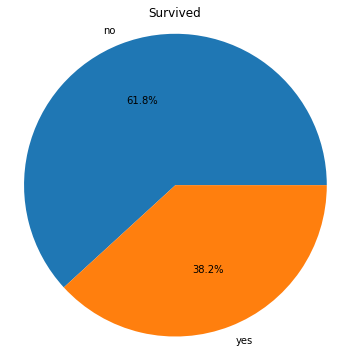

In [ ]:
plot = pd.crosstab(index=titanic["survived"], columns="count")\
    .plot.pie(autopct='%1.1f%%', y="count", figsize=[6,6], title="Survived", legend=False)
plot.set_ylabel("")
plot.axis('equal')

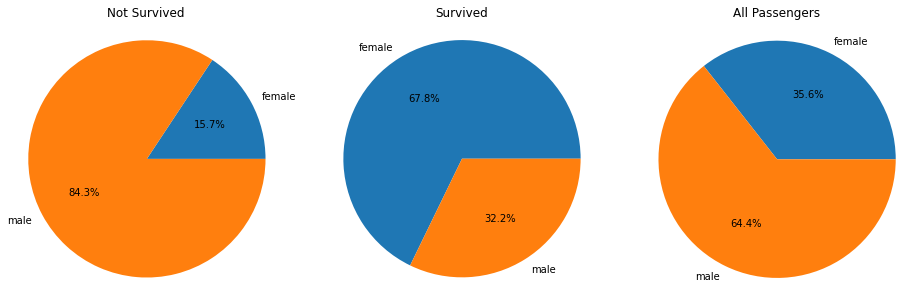

In [ ]:
plots = titanic_sex.div(titanic_sex["All"], axis=0).transpose()[0:2].plot.pie(figsize=[16,5], \
subplots=True, legend=False,  autopct='%1.1f%%', title=["Not Survived","Survived","All Passengers"])
for plot in plots:
    plot.set_ylabel('')
    plot.axis('equal')

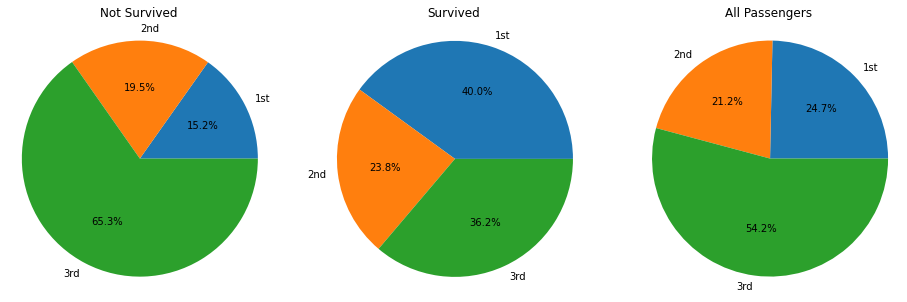

In [ ]:
plots = titanic_class.div(titanic_class["All"], axis=0).transpose()[0:3].\
plot.pie(title=["Not Survived","Survived","All Passengers"],figsize=[16,5],\
subplots=True, legend=False,  autopct='%1.1f%%')
for plot in plots:
    plot.set_ylabel('')
    plot.axis('equal')

(-1.1074065303894531,
 1.1003526919233073,
 -1.1089434829190796,
 1.1091572404708565)

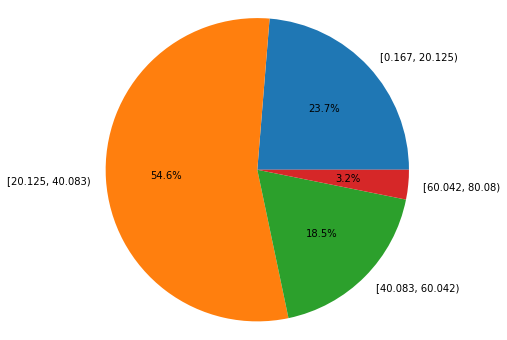

In [ ]:
s = titanic['age'].dropna().to_numpy()
out, bins = pd.cut(s, bins=4, include_lowest=True, right=False, retbins=True)
out.value_counts().plot.pie(figsize=[6,6], legend=False, autopct='%1.1f%%')
plt.ylabel("")
plt.axis('equal')

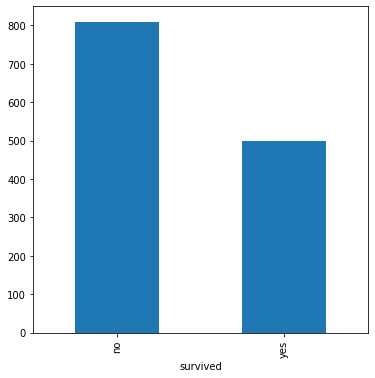

In [ ]:
plot = pd.crosstab(index=titanic["survived"], columns="count")\
    .plot.bar(y="count", figsize=[6,6], legend=False)

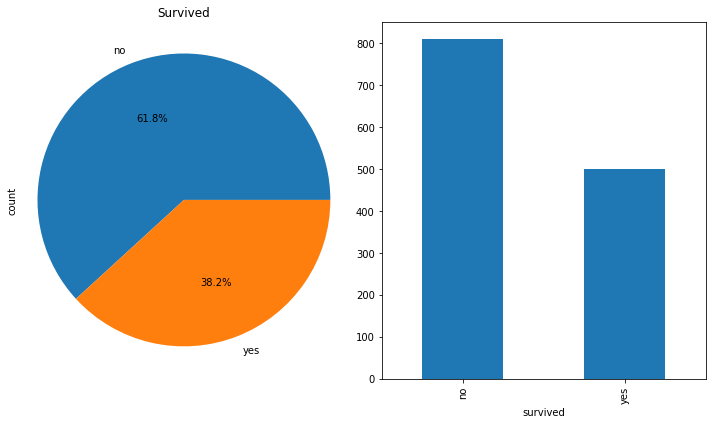

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
plot = pd.crosstab(index=titanic["survived"], columns="count")\
    .plot.pie(ax=axes[0], autopct='%1.1f%%', y="count", title="Survived", legend=False)
plot.axis('equal')
pd.crosstab(index=titanic["survived"], columns="count")\
    .plot.bar(ax=axes[1], y="count", legend=False)
fig.tight_layout()

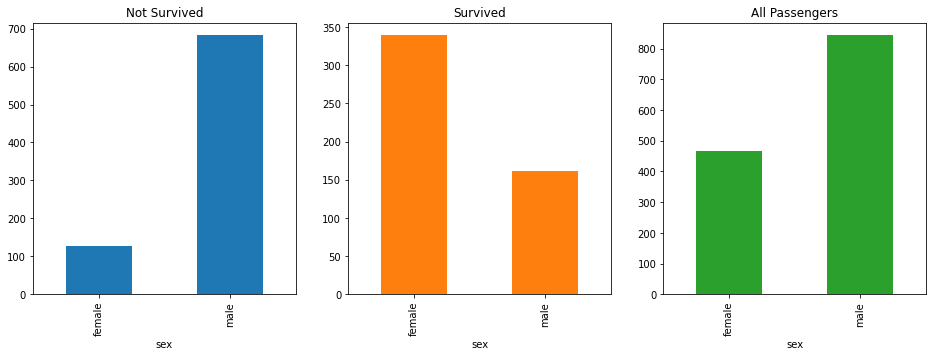

In [ ]:
plots = titanic_sex.transpose()[0:2].plot.bar(figsize=[16,5], \
subplots=True, legend=False, title=["Not Survived","Survived","All Passengers"], layout=(1,3))

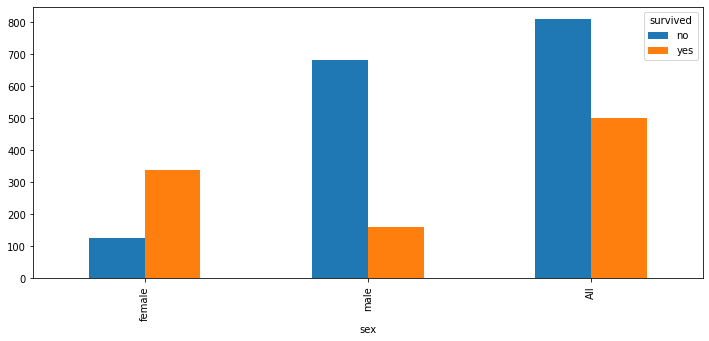

In [ ]:
plots = titanic_sex[0:2].transpose()[0:3].plot.bar(figsize=[12,5])

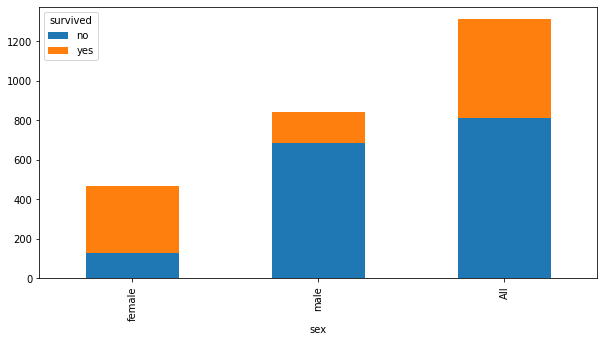

In [ ]:
plots = titanic_sex[0:2].transpose()[0:3].plot.bar(figsize=[10,5], stacked=True)

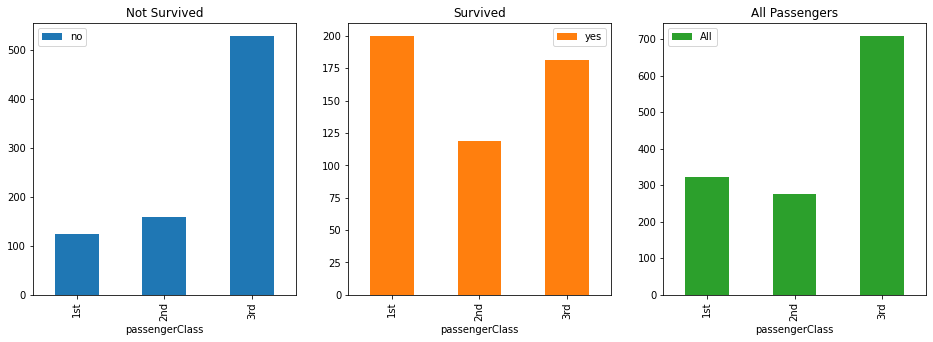

In [ ]:
plots = titanic_class.transpose()[0:3].\
plot.bar(title=["Not Survived","Survived","All Passengers"],figsize=[16,5],\
subplots=True, layout=(1,3))

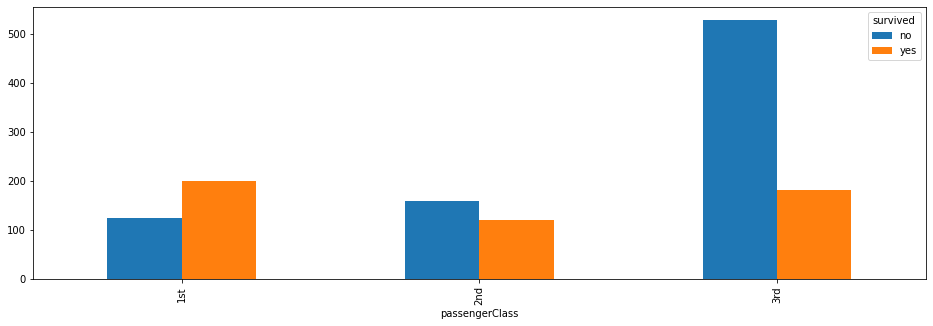

In [ ]:
plots = titanic_class[0:2].transpose()[0:3].\
plot.bar(figsize=[16,5])

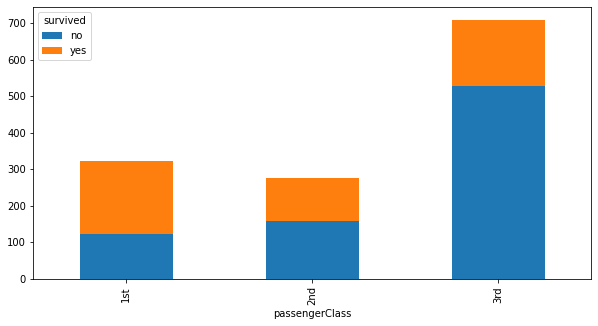

In [ ]:
plots = titanic_class[0:2].transpose()[0:3].plot.bar(figsize=[10,5], stacked=True)

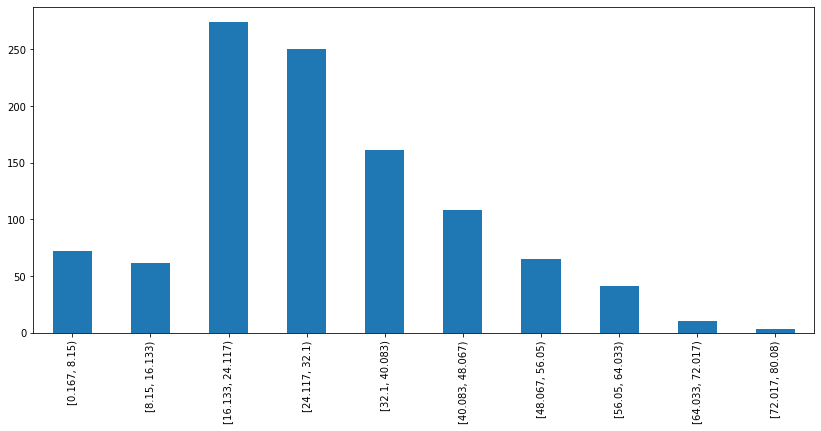

In [ ]:
s = titanic['age'].dropna().to_numpy()
out, bins = pd.cut(s, bins=10, include_lowest=True, right=False, retbins=True)
out.value_counts().plot.bar(figsize=[14,6])

(-1.1074065303894531,
 1.1003526919233073,
 -1.1089434829190796,
 1.1091572404708565)

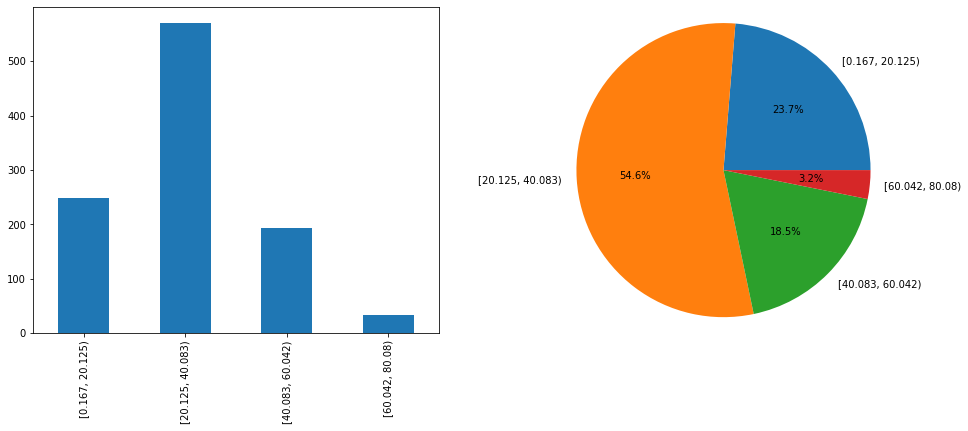

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
n_bins=4
s = titanic['age'].dropna().to_numpy()
out, bins = pd.cut(s, bins=n_bins, include_lowest=True, right=False, retbins=True)
out.value_counts().plot.bar(ax=axes[0])

s = titanic['age'].dropna().to_numpy()
out, bins = pd.cut(s, bins=n_bins, include_lowest=True, right=False, retbins=True)
out.value_counts().plot.pie(ax=axes[1], legend=False, autopct='%1.1f%%')
plt.ylabel("")
plt.axis('equal')